In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('Financials.csv')
df = pd.DataFrame(df)

In [34]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [36]:
df.columns = df.columns.str.strip()
new_columns = {col: col.lower().replace(' ', '_') for col in df.columns}
df.rename(columns=new_columns, inplace=True)
df.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [38]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

In [39]:
num_cols = ['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit']
for col in num_cols:
    df[col] = df[col].replace({'\$' : '', ',' : '', '\(' : '', '\)' : '', '-' : '0', ' ' : ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

In [40]:
df = df.apply(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


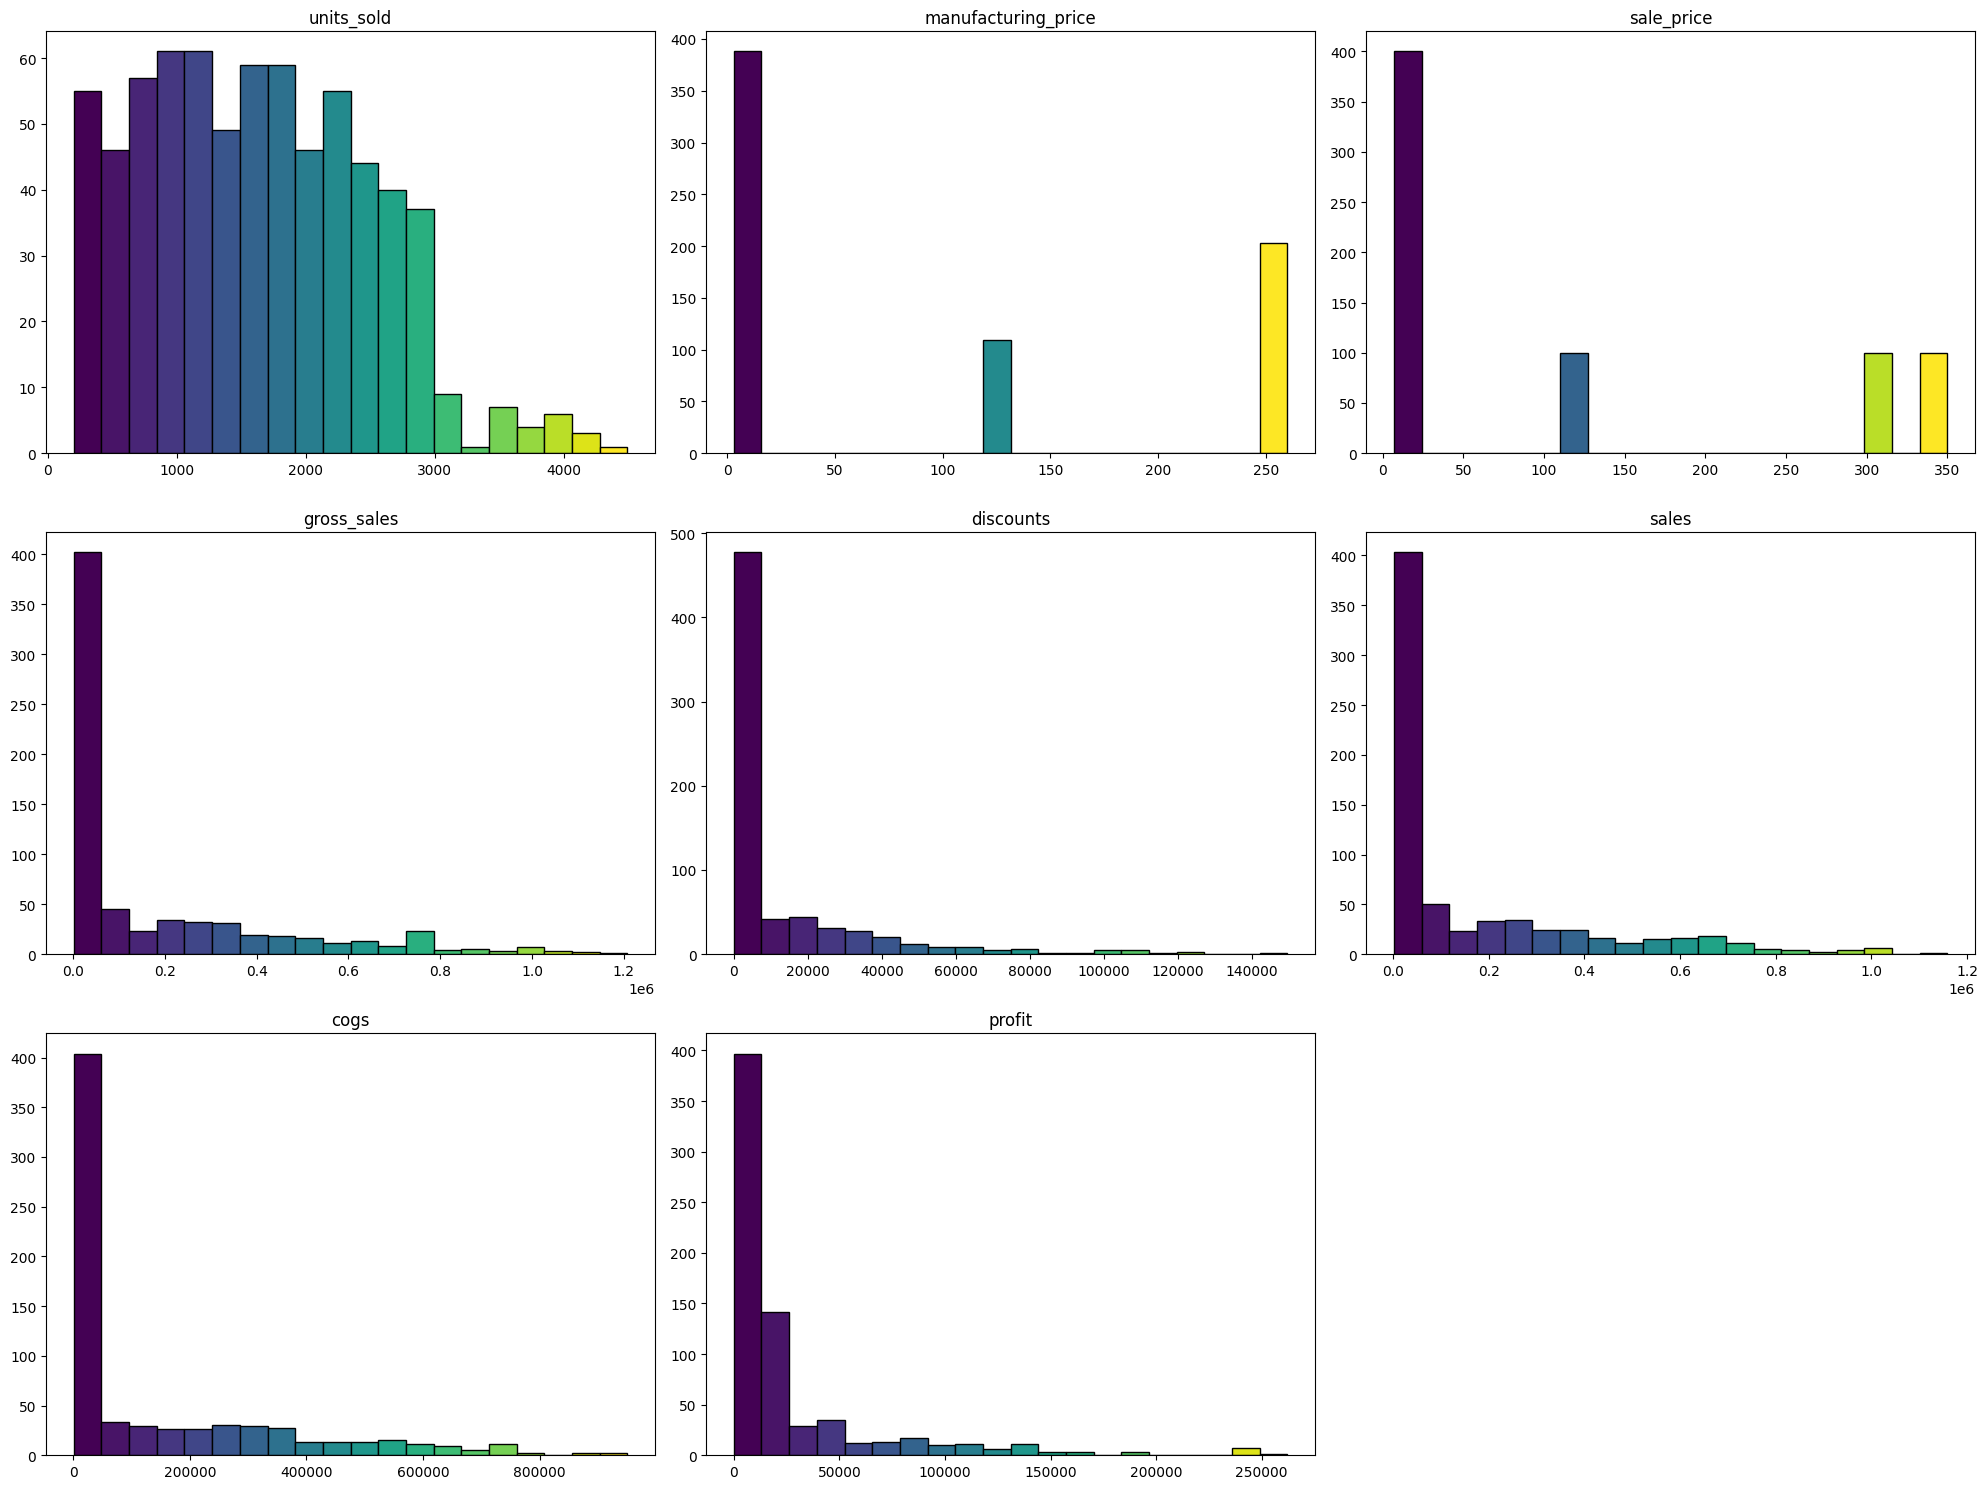

In [41]:
num_bins = 20
colors = plt.cm.viridis(np.linspace(0,1,num_bins))
fig, axes = plt.subplots(3,3, figsize=(20,15))

for ax, col in zip(axes.flatten(), num_cols):
    n, bins, patches = ax.hist(df[col], bins=num_bins, edgecolor='black')
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
    ax.set_title(col)

for i in range(len(num_cols), 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

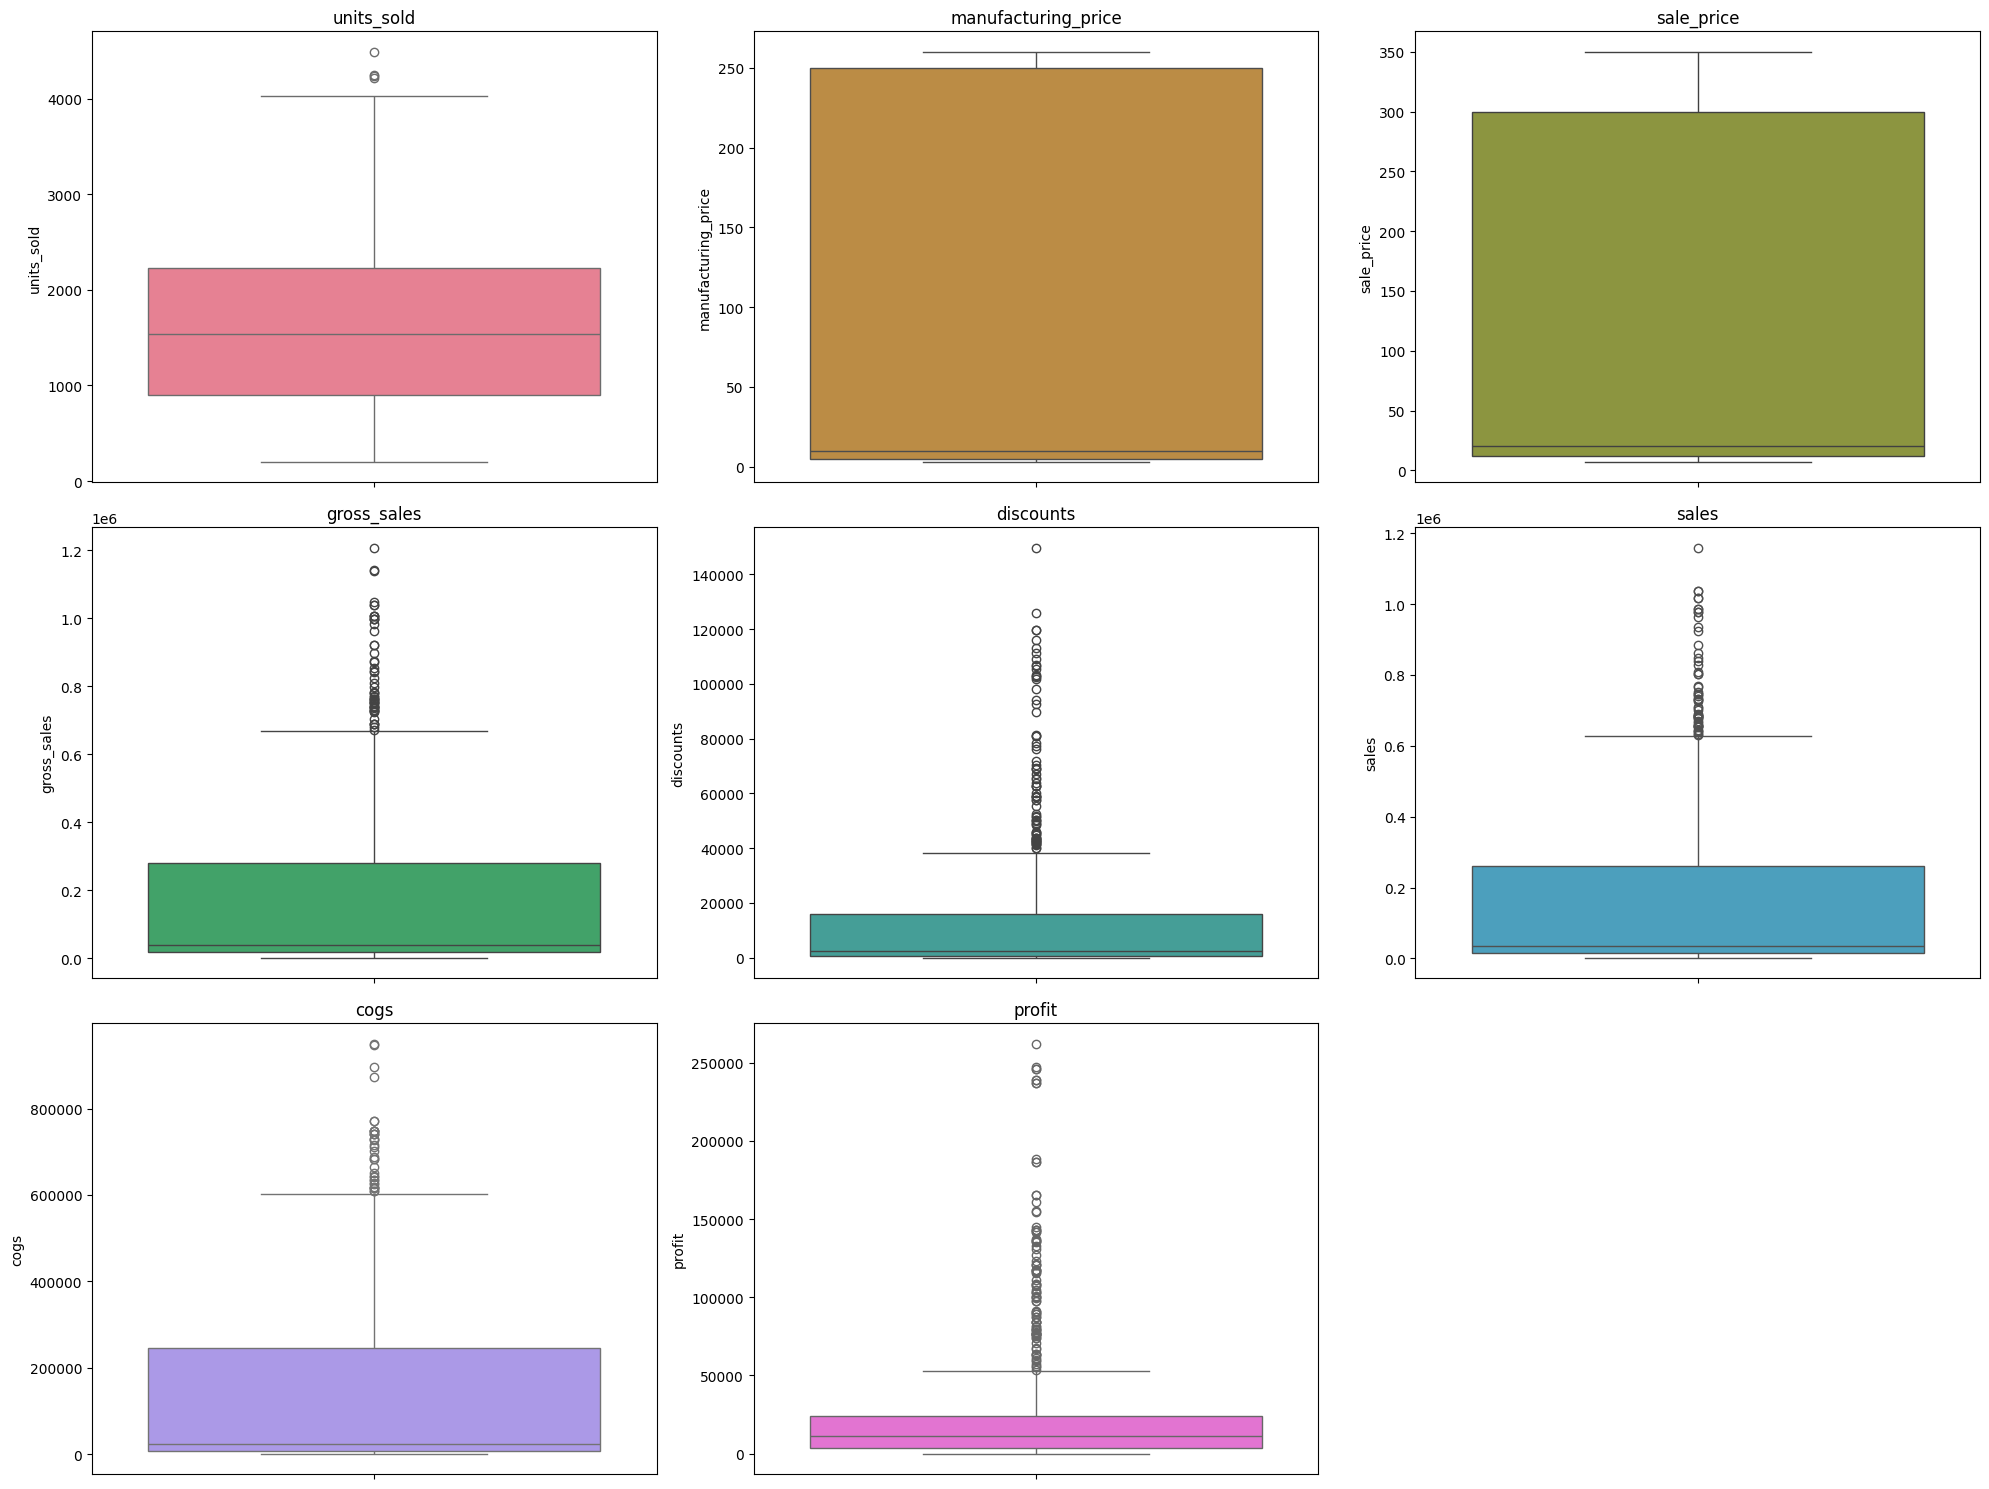

In [42]:
plt.figure(figsize=(20,15))
colors2 = sns.color_palette('husl', len(num_cols))

for i, (col, color) in enumerate(zip(num_cols, colors2), 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col], color = color)
    plt.title(col)

plt.tight_layout()
plt.show()

In [43]:
z_score = np.abs(stats.zscore(df[num_cols]))
outliers = np.where(z_score>3)
outlier_df = df.iloc[outliers[0], :]
print(outlier_df)

            segment                   country     product discount_band  \
26       Government                    Canada      Paseo          None    
45       Government                    France   Amarilla          None    
45       Government                    France   Amarilla          None    
45       Government                    France   Amarilla          None    
47       Enterprise                   Germany   Amarilla          None    
..              ...                       ...         ...           ...   
673      Government                    Mexico      Paseo          High    
678      Government  United States of America      Paseo          High    
679      Government                    Mexico      Paseo          High    
685  Small Business  United States of America       Velo          High    
695  Small Business                    France   Amarilla          High    

     units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
26       1725.0        

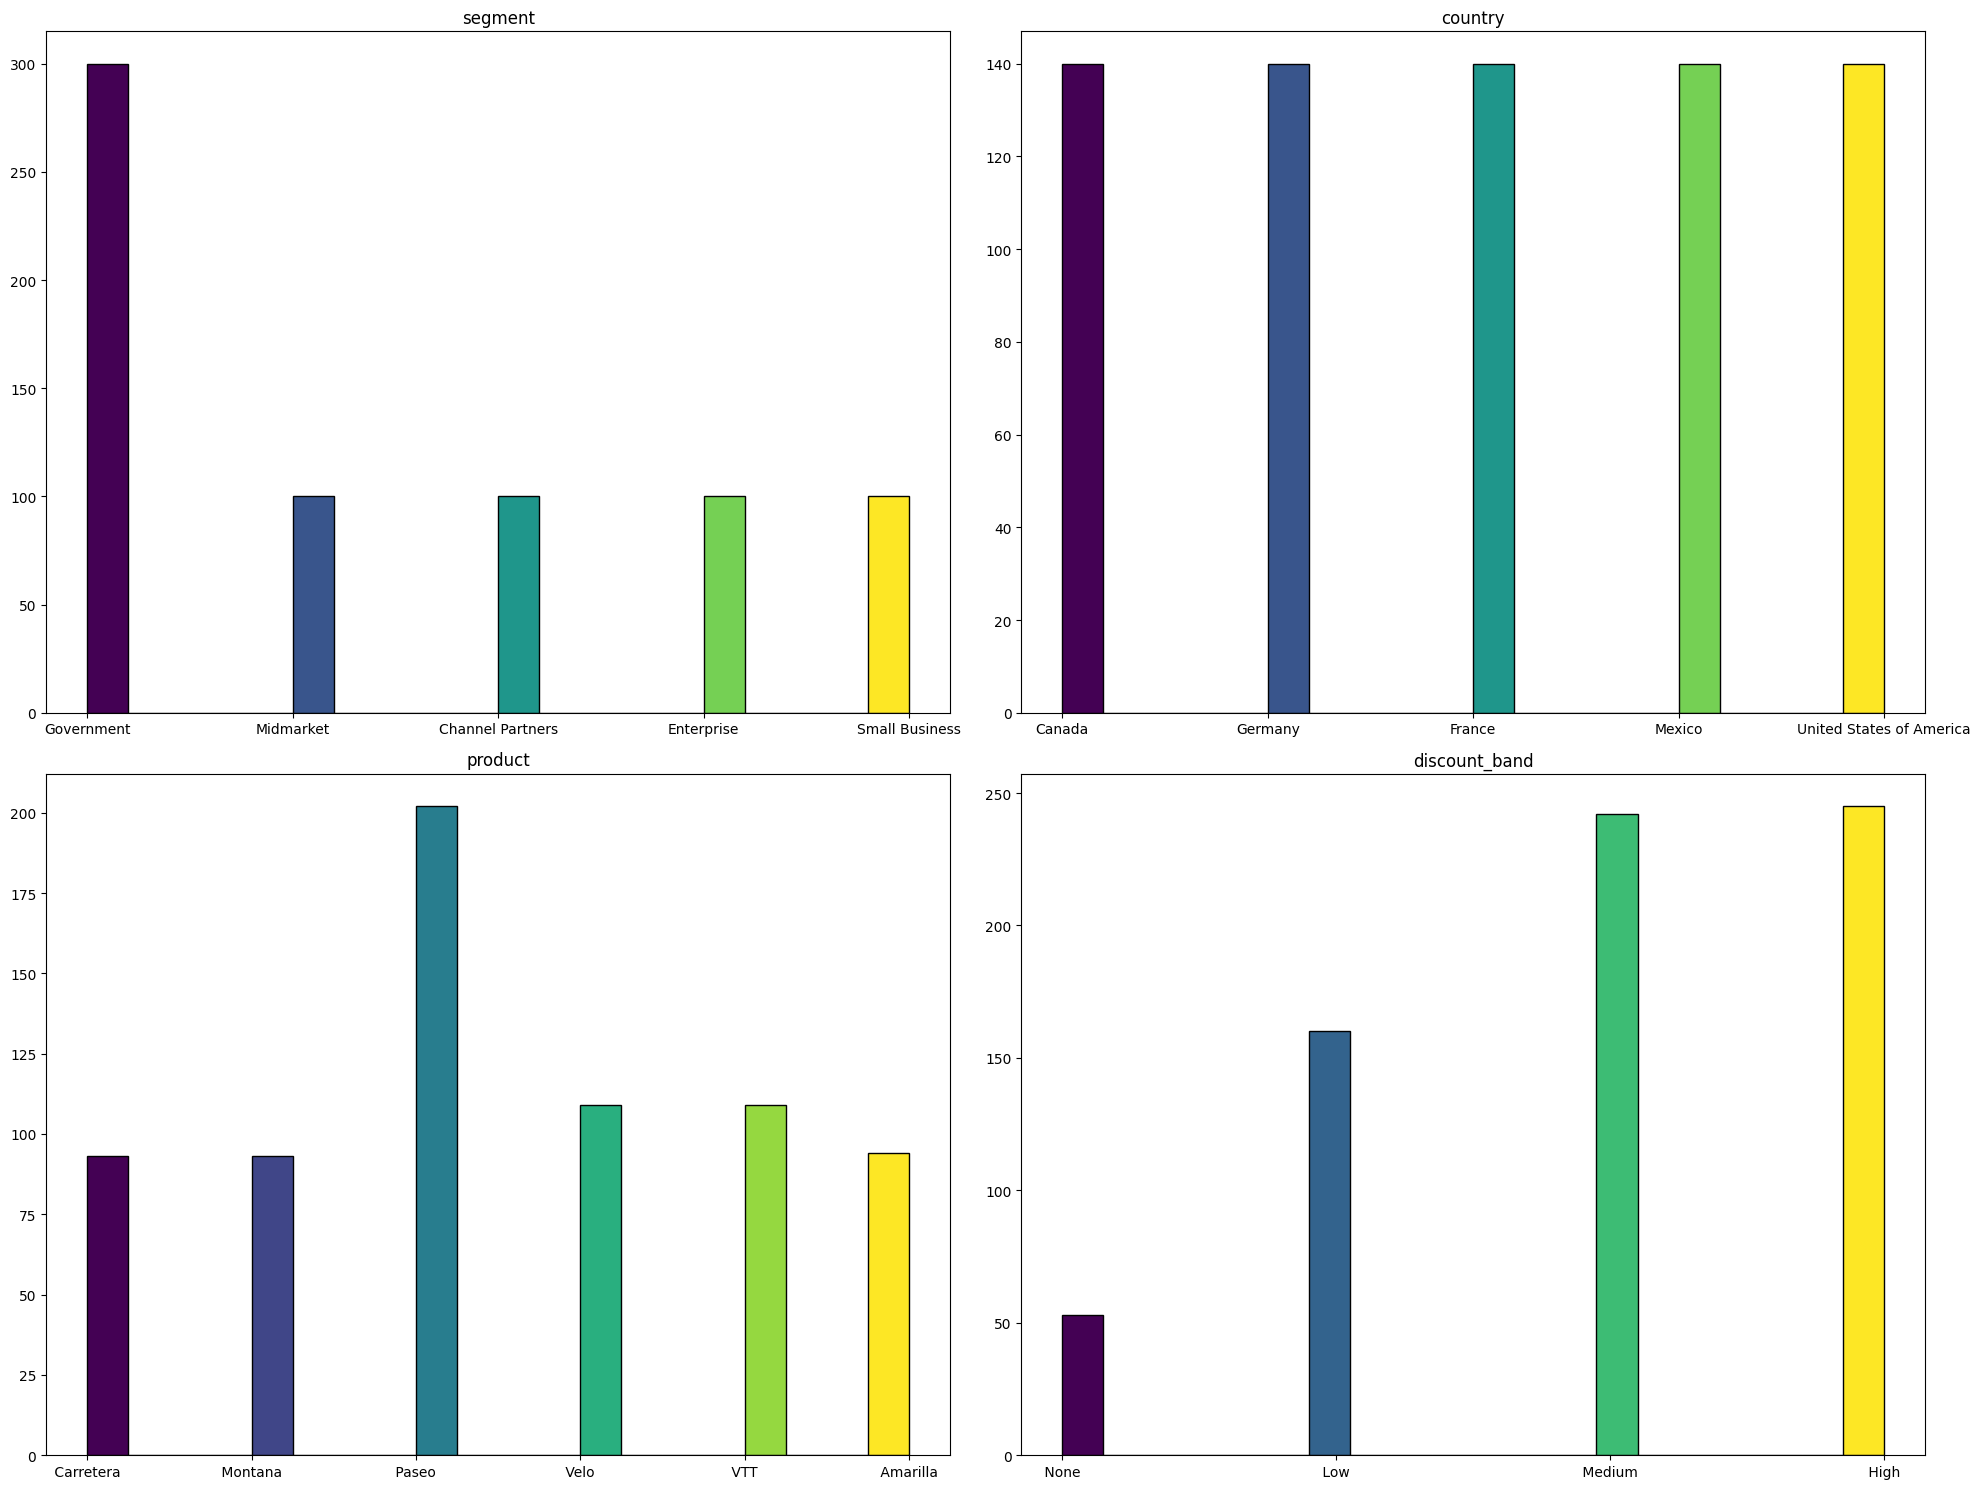

In [44]:
cat_cols = ['segment', 'country', 'product', 'discount_band']
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ax, col in zip(axes.flatten(), cat_cols):
    n, bins, patches = ax.hist(df[col].astype(str), bins=num_bins, edgecolor='black')
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
    ax.set_title(col)

for i in range(len(cat_cols), 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

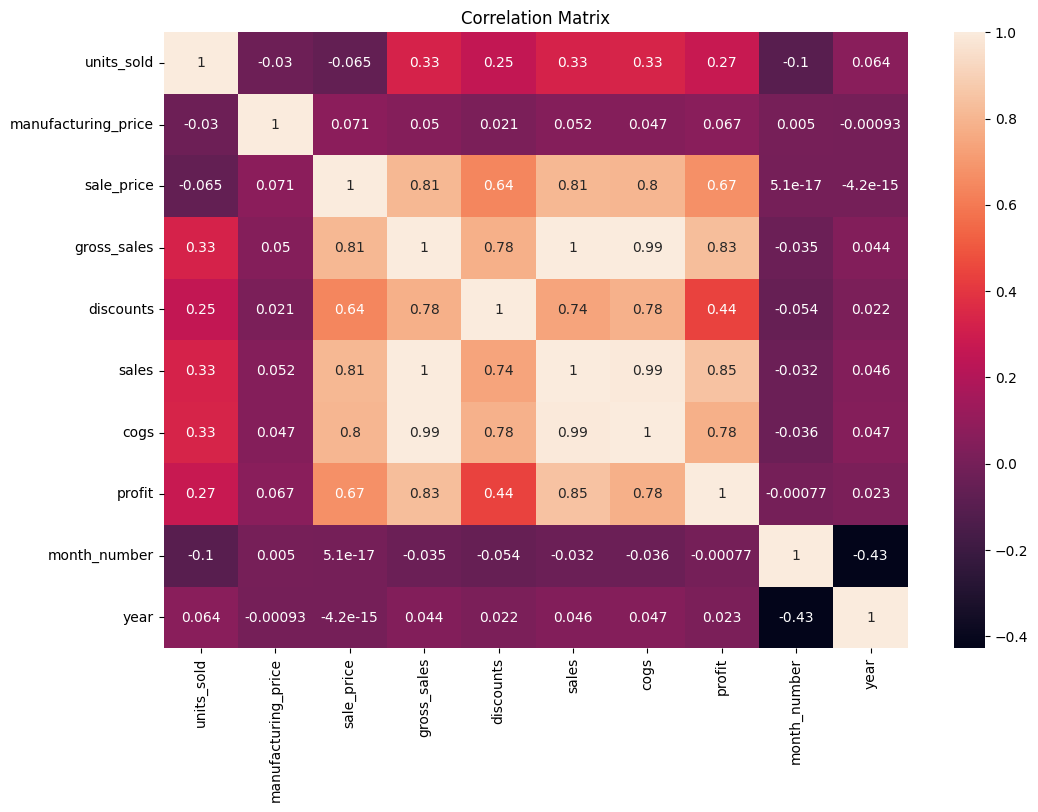

In [45]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [47]:
treshold = 0.7
corr_pairs = corr_matrix.unstack().sort_values(kind='quicksort', ascending=False).drop_duplicates()
high_corr = corr_pairs[(corr_pairs)>treshold]
print(f'High correlated pairs (umbral={treshold}):\n{high_corr}')

High correlated pairs (umbral=0.7):
units_sold   units_sold     1.000000
sales        gross_sales    0.998174
gross_sales  cogs           0.994519
cogs         sales          0.992244
profit       sales          0.847699
gross_sales  profit         0.828931
sale_price   gross_sales    0.808250
             sales          0.805878
             cogs           0.799335
discounts    cogs           0.782930
gross_sales  discounts      0.782485
cogs         profit         0.779744
discounts    sales          0.743447
dtype: float64


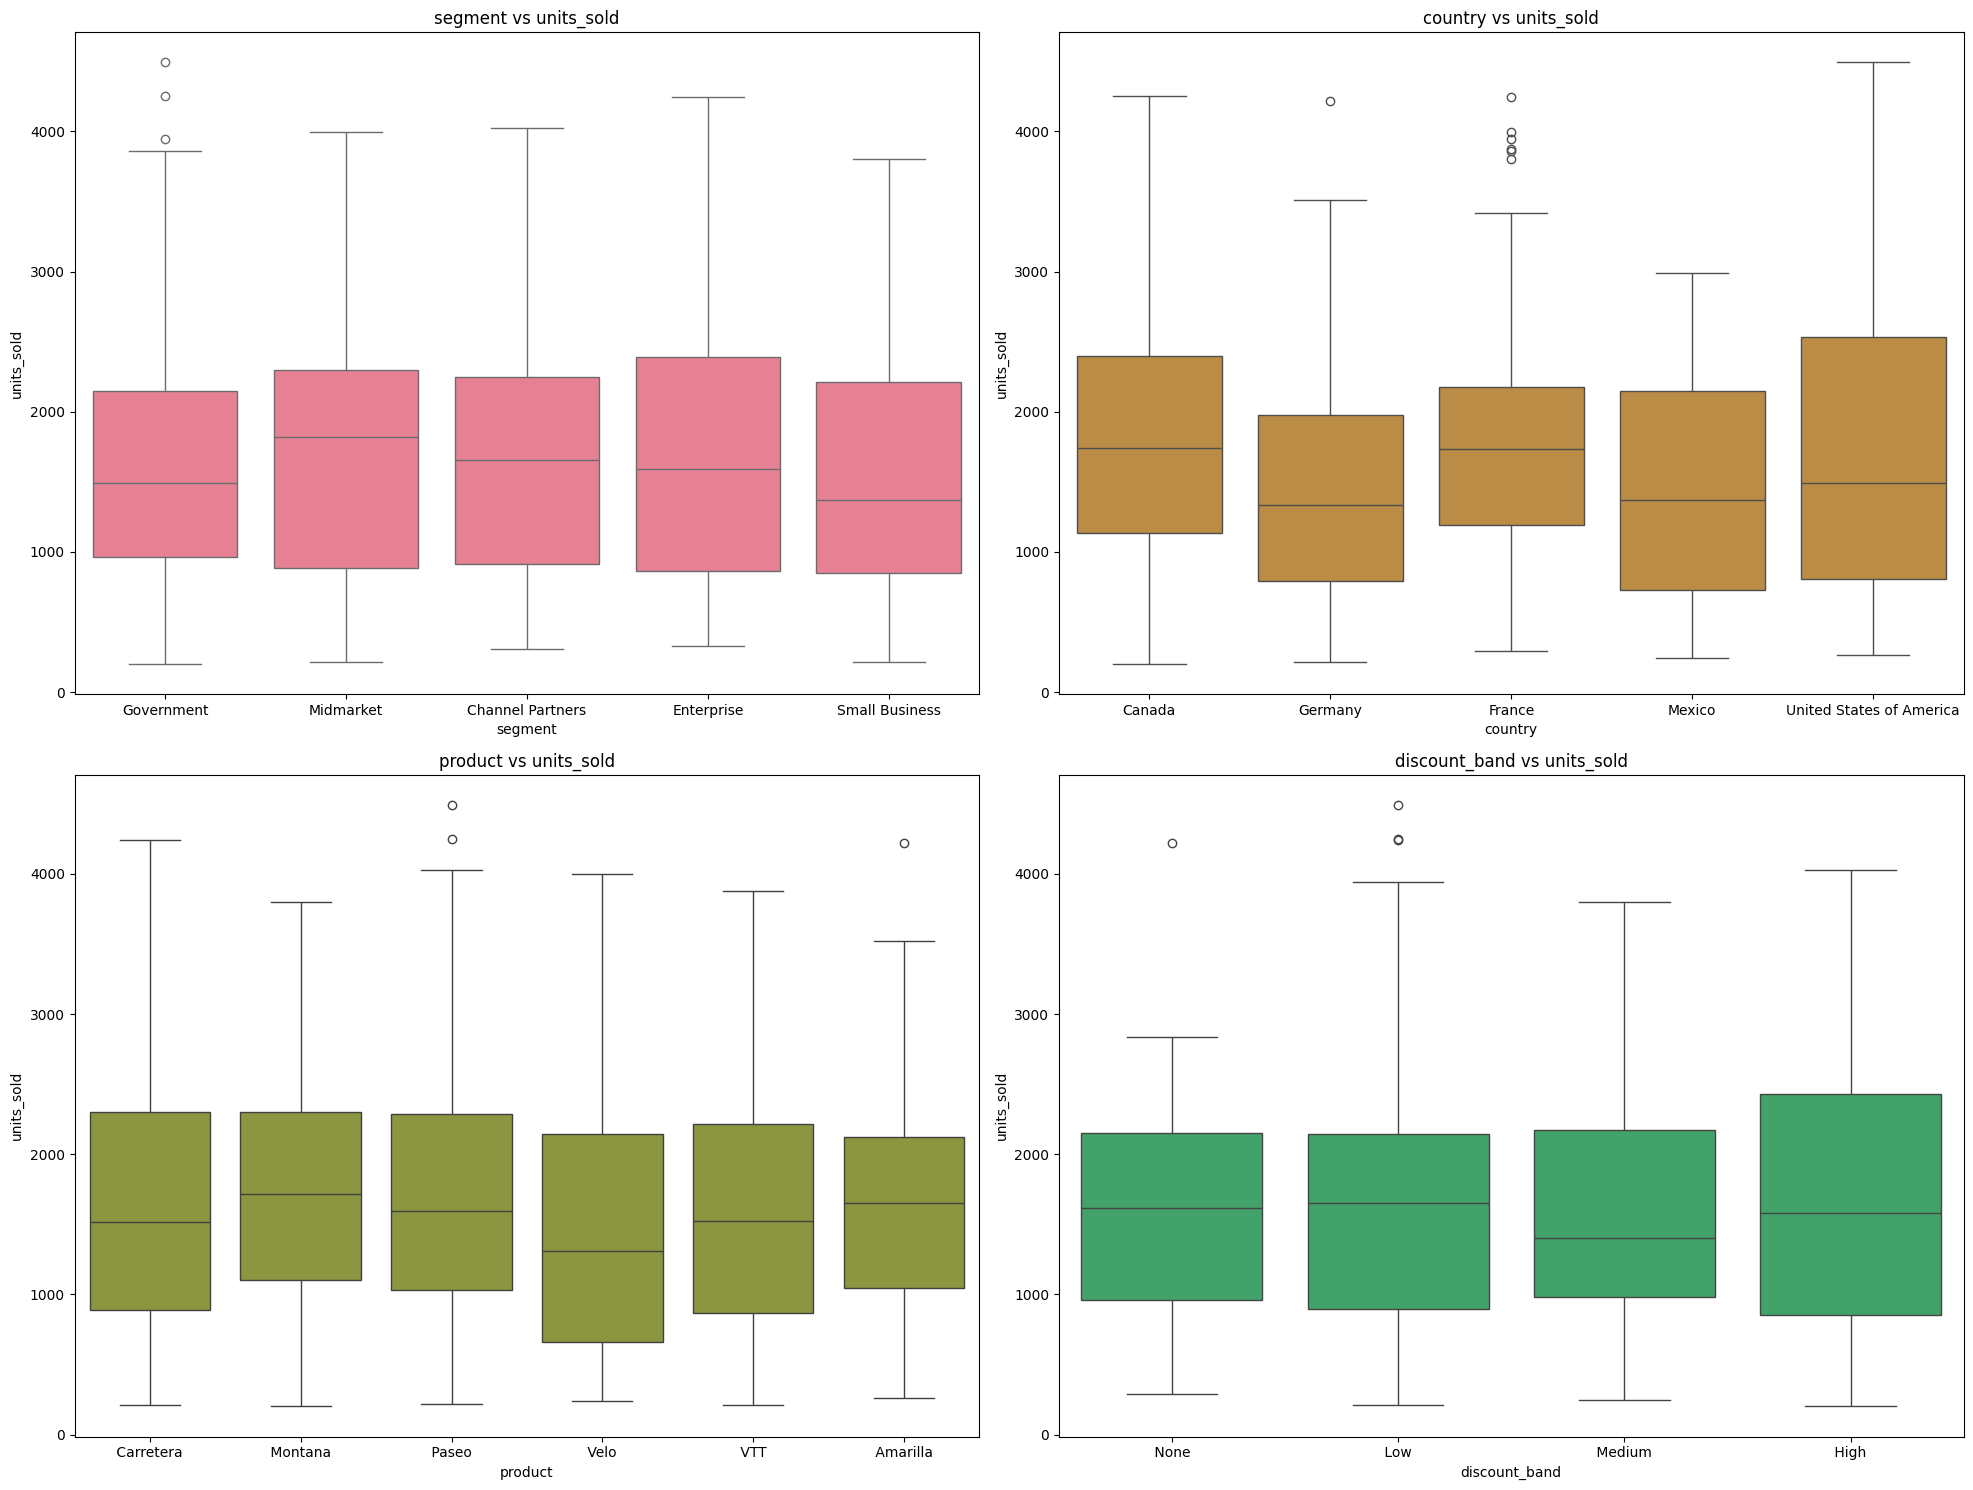

In [48]:
plt.figure(figsize=(20,15))

for i, (col, color) in enumerate(zip(cat_cols, colors2), 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col, y='units_sold', data=df, color=color)
    plt.title(f'{col} vs units_sold')

plt.tight_layout()
plt.show()

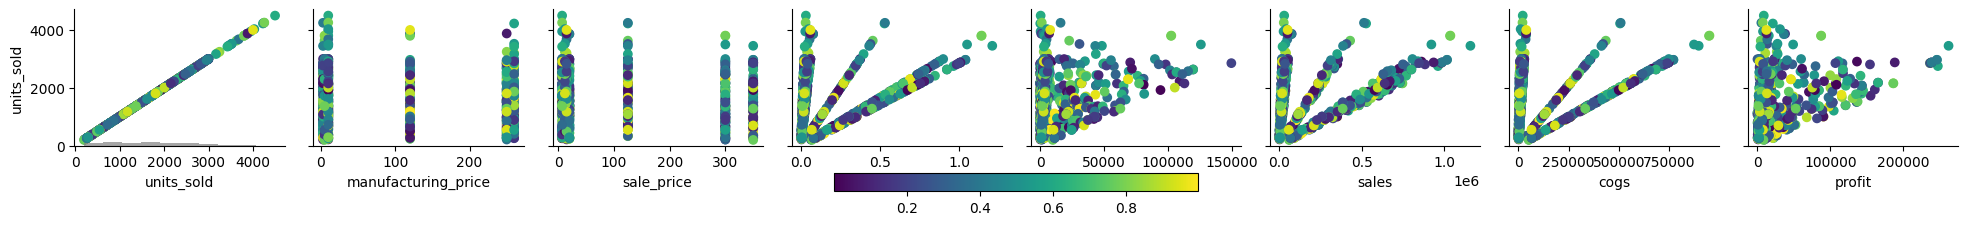

In [59]:
# Crear el PairGrid
g = sns.PairGrid(df, x_vars=num_cols, y_vars=['units_sold'])

# Colores personalizados
colors = np.random.rand(len(df))

# Mapa de gráficos para dispersión y barras
g.map(sns.scatterplot, color='blue')

# Iterar sobre los ejes del PairGrid para aplicar los colores personalizados
for i, ax in enumerate(g.axes.flat):
    if ax:
        # Obtener el nombre de la columna para el eje x
        x_var = num_cols[i % len(num_cols)]

        # Extraer los datos directamente del DataFrame
        x = df[x_var]
        y = df['units_sold']

        # Limpiar el eje y redibujar los puntos con los colores personalizados
        ax.cla()
        ax.scatter(x, y, c=colors, cmap='viridis')
        
        # Graficar histogramas (barras) en las subparcelas de la diagonal
        if x_var == 'units_sold':
            ax.hist(x, bins=10, color='gray', alpha=0.7)
        
        # Agregar etiquetas
        ax.set_xlabel(x_var)
        ax.set_ylabel('units_sold')

# Agregar una barra de color para referencia
plt.colorbar(ax.collections[0], ax=g.axes, orientation='horizontal', fraction=.1)
plt.show()

In [49]:
grouped_df = df.groupby('date').agg(dict(zip(num_cols, ['sum'] * len(num_cols)))).reset_index()

In [50]:
fig = px.line(grouped_df, y=['sales', 'profit', 'gross_sales'],
              title='Monthly evolution of sales profit and gross_sales',
              labels={'date' : 'Month', 'value' : 'Frec', 'variable' : 'Var'},
              width=1000, height=600)
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Frec')
fig.show()

In [51]:
fig = px.bar(grouped_df, x='date', y =['sales', 'profit', 'gross_sales'],
             barmode='group', title='Monthly sales, profit and gross_sales')
fig.show()